## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4802 entries, 2000-01-03 to 2019-02-05
Data columns (total 5 columns):
BP      4802 non-null float64
F       4802 non-null float64
XOM     4802 non-null float64
LNC     4802 non-null float64
AAPL    4802 non-null float64
dtypes: float64(5)
memory usage: 225.1 KB


In [4]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,25.573839,16.335928,22.905508,25.300928,2.677157
2000-01-04,25.437960,15.790089,22.466774,24.572268,2.451444
2000-01-05,26.307631,15.848574,23.691563,23.722162,2.487319
2000-01-06,26.361984,15.868063,24.916372,24.156319,2.272070
2000-01-07,25.872786,17.037699,24.843235,24.768377,2.379695


In [5]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2019-01-29,40.200001,8.610001,71.510002,58.110001,154.679993
2019-01-30,40.669998,8.710000,72.290001,57.900002,165.250000
2019-01-31,41.119999,8.800000,73.279999,58.490002,166.440002
2019-02-01,41.340000,8.720000,75.919998,58.650002,166.520004
2019-02-05,42.680000,8.670000,75.274399,58.630001,173.830002


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [6]:
mydata.iloc[0]

BP      25.573839
F       16.335928
XOM     22.905508
LNC     25.300928
AAPL     2.677157
Name: 2000-01-03 00:00:00, dtype: float64

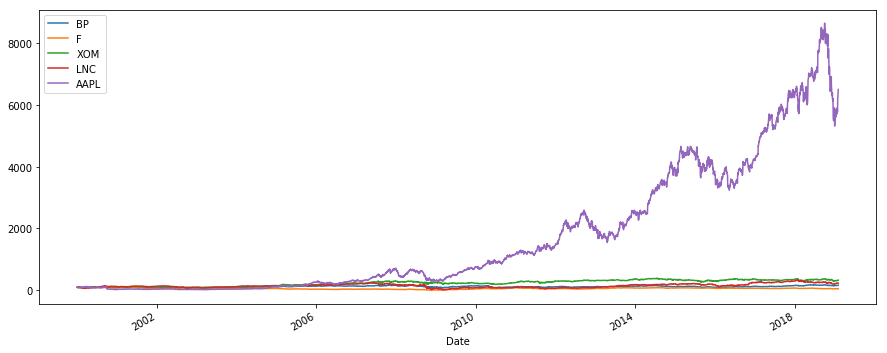

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [8]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005313,-0.033413,-0.019154,-0.028800,-0.084311
2000-01-05,0.034188,0.003704,0.054516,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051698,0.018302,-0.086538
2000-01-07,-0.018557,0.073710,-0.002935,0.025337,0.047369


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [9]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [10]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.065538
F       0.053921
XOM     0.090814
LNC     0.178157
AAPL    0.304905
dtype: float64

In [11]:
np.dot(annual_returns, weights)

0.13866694550937259

Transform the result into a percentage form. 

In [12]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print pfolio_1

13.867 %


Is the return of this portfolio satisfactory?